In [92]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import seaborn as sns
#from kmodes.kmodes import KPrototypes
import statsmodels.api as sm

# Customer Personality Analysis Dataset

Load dataset

In [93]:
df = pd.read_csv("./marketing_campaign.csv",delimiter="\t")
df.head()
df.drop(columns=["ID"], inplace=True)

In [94]:
df.info()
education = np.apply_along_axis(lambda x : "Education_"+x, axis=0, arr=df["Education"].unique())
marital_status = np.apply_along_axis(lambda x : "Marital_Status_"+x, axis=0, arr=df["Marital_Status"].unique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   i

In [95]:
#removing duplicates
df.drop_duplicates(inplace=True)

In [96]:
#removing column year of birth and creating a column age ( age of each person in the moment he/she enroll)
df["age"] = (df["Dt_Customer"].apply(lambda x : x.split("-")[2]).astype(int)).to_numpy()-df["Year_Birth"].to_numpy()
df.drop(columns=["Year_Birth", "Dt_Customer"], inplace=True)

The dataset has $2058$ fields. We have some missing values for the attribute "Income". We can keep them. We only remove when we consider the attribute income in our analysis.

In [97]:
df.dropna(inplace=True)

## Attributes

There are 29 attributes, we can divide them into 4 macro-categories: 
* People

    * ID: Customer's unique identifier
    * Year_Birth: Customer's birth year
    * Education: Customer's education level
    * Marital_Status: Customer's marital status
    * Income: Customer's yearly household income
    * Kidhome: Number of children in customer's household
    * Teenhome: Number of teenagers in customer's household
    * Dt_Customer: Date of customer's enrollment with the company
    * Recency: Number of days since customer's last purchase
    * Complain: 1 if customer complained in the last 2 years, 0 otherwise

* Products

    * MntWines: Amount spent on wine in last 2 years
    * MntFruits: Amount spent on fruits in last 2 years
    * MntMeatProducts: Amount spent on meat in last 2 years
    * MntFishProducts: Amount spent on fish in last 2 years
    * MntSweetProducts: Amount spent on sweets in last 2 years
    * MntGoldProds: Amount spent on gold in last 2 years

* Promotion

    * NumDealsPurchases: Number of purchases made with a discount
    * AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
    * AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
    * AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
    * AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
    * AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
    * Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

* Place

    * NumWebPurchases: Number of purchases made through the company’s web site
    * NumCatalogPurchases: Number of purchases made using a catalogue
    * NumStorePurchases: Number of purchases made directly in stores
    * NumWebVisitsMonth: Number of visits to company’s web site in the last month

## Exploring data (people)

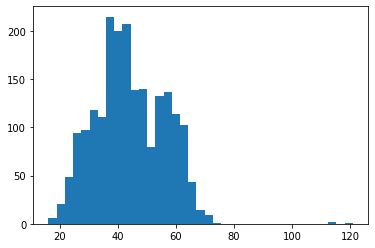

In [8]:
import matplotlib.pyplot as plt
plt.hist(df['age'],bins="auto");

There are two outliers: they are probably data entry errors (human errors while collecting data). We remove them.

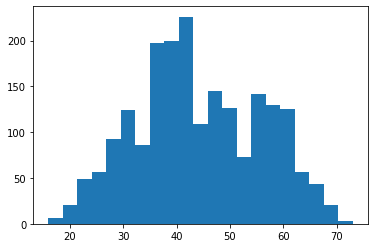

In [9]:
mask = df['age'] < 90
df = df[mask]
plt.hist(df['age'],bins="auto");

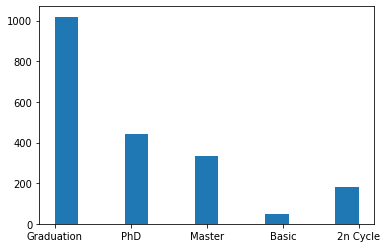

In [10]:
plt.hist(df['Education'],bins="auto");

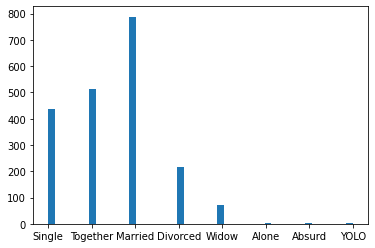

In [11]:
plt.hist(df['Marital_Status'],bins="auto");

From the histogram we can see strange values such as 'Alone', 'Absurd', 'YOLO', we assume that are human errors and we can remove them without affecting our analysis.

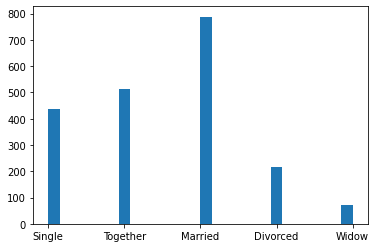

In [12]:
alone = df['Marital_Status'] == 'Alone'
df = df[~alone]
absurd = df['Marital_Status'] == 'Absurd'
df = df[~absurd]
yolo =  df['Marital_Status'] == 'YOLO'
df = df[~yolo]
plt.hist(df['Marital_Status'],bins="auto");

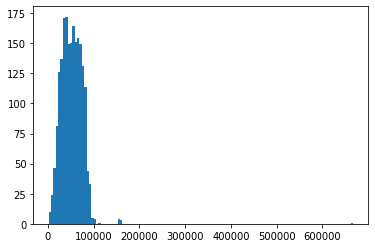

In [13]:
plt.hist(df['Income'],bins="auto");

There's one value with income = 666666, since it's an outlier and many algorithms are sensitive to outliers we remove it.

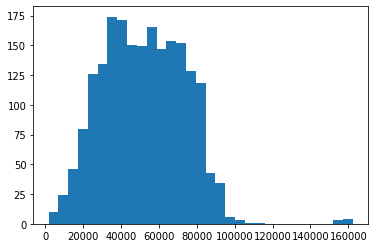

In [14]:
income = df['Income'] > 200000
df = df[~income]
plt.hist(df['Income'],bins="auto");

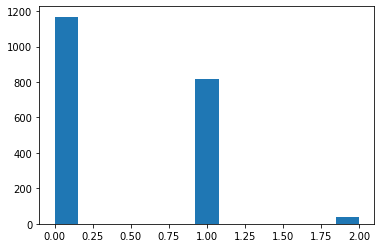

In [15]:
plt.hist(df['Kidhome'],bins="auto");

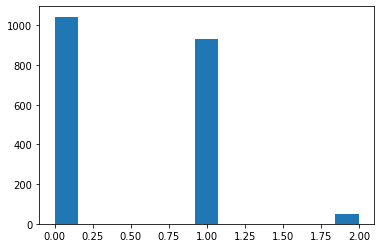

In [16]:
plt.hist(df['Teenhome'],bins="auto");

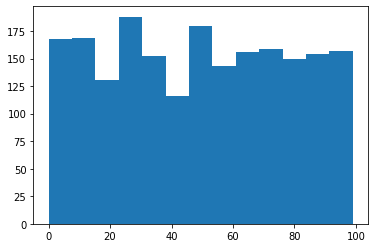

In [17]:
plt.hist(df['Recency'],bins="auto");

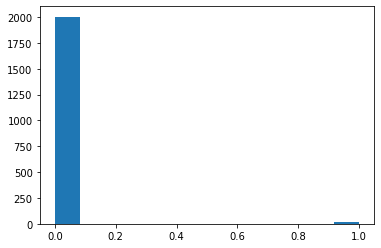

In [18]:
plt.hist(df['Complain'],bins="auto");

## Exploring data (Products)

Text(0, 0.5, 'freq')

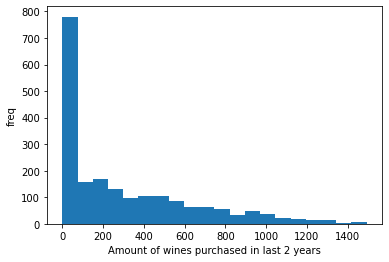

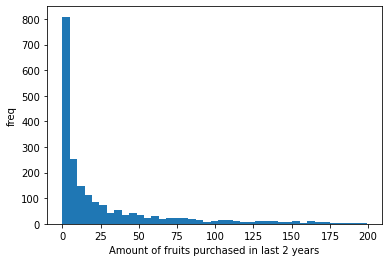

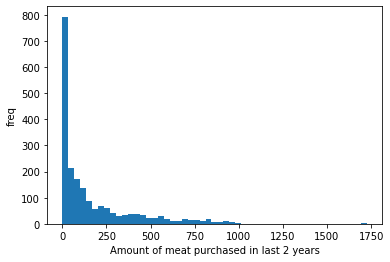

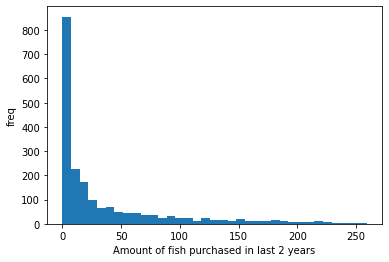

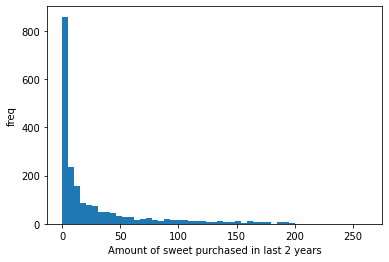

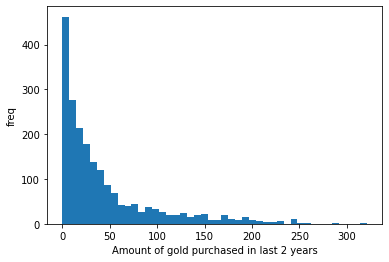

In [19]:
plt.figure(1)
plt.hist(df['MntWines'],bins="auto");
plt.xlabel("Amount of wines purchased in last 2 years")
plt.ylabel("freq")

plt.figure(2)
plt.hist(df['MntFruits'],bins="auto");
plt.xlabel("Amount of fruits purchased in last 2 years")
plt.ylabel("freq")

plt.figure(3)
plt.hist(df['MntMeatProducts'],bins="auto");
plt.xlabel("Amount of meat purchased in last 2 years")
plt.ylabel("freq")

plt.figure(4)
plt.hist(df['MntFishProducts'],bins="auto");
plt.xlabel("Amount of fish purchased in last 2 years")
plt.ylabel("freq")

plt.figure(5)
plt.hist(df['MntSweetProducts'],bins="auto");
plt.xlabel("Amount of sweet purchased in last 2 years")
plt.ylabel("freq")

plt.figure(6)
plt.hist(df['MntGoldProds'],bins="auto");
plt.xlabel("Amount of gold purchased in last 2 years")
plt.ylabel("freq")

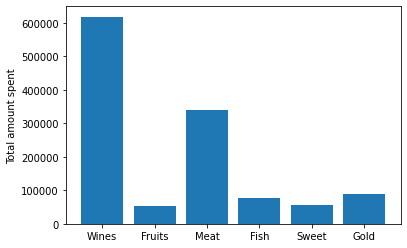

In [20]:
w = df['MntWines'].sum()
f = df['MntFruits'].sum()
m = df['MntMeatProducts'].sum()
fi = df['MntFishProducts'].sum()
s = df['MntSweetProducts'].sum()
g = df['MntGoldProds'].sum()
y = np.array([w,f,m,fi,s,g])
x = np.array(["Wines","Fruits","Meat","Fish","Sweet","Gold"])
plt.ylabel("Total amount spent")
plt.bar(x,y);

## Exploring data (Purchases)

Text(0, 0.5, 'freq')

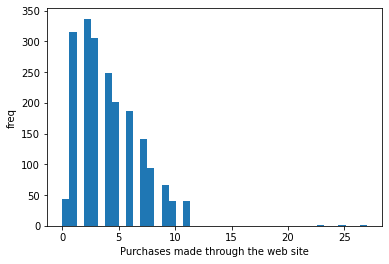

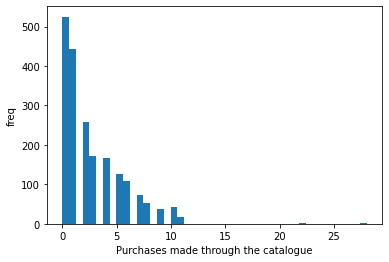

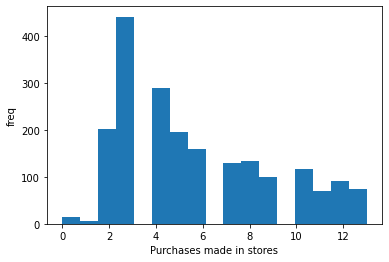

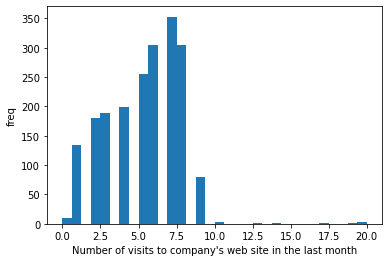

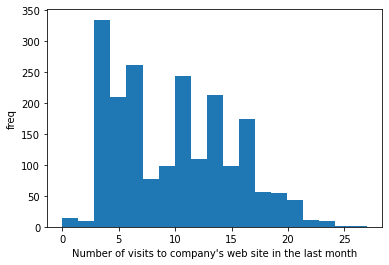

In [20]:
plt.figure(1)
plt.hist(df['NumWebPurchases'],bins="auto");
plt.xlabel("Purchases made through the web site")
plt.ylabel("freq")

plt.figure(2)
plt.hist(df['NumCatalogPurchases'],bins="auto");
plt.xlabel("Purchases made through the catalogue")
plt.ylabel("freq")

plt.figure(3)
plt.hist(df['NumStorePurchases'],bins="auto");
plt.xlabel("Purchases made in stores")
plt.ylabel("freq")

plt.figure(4)
plt.hist(df['NumWebVisitsMonth'],bins="auto");
plt.xlabel("Number of visits to company's web site in the last month")
plt.ylabel("freq")

plt.figure(5)
plt.hist((df['NumWebPurchases'].to_numpy()+df['NumStorePurchases'].to_numpy()),bins="auto");
plt.xlabel("Number of visits to company's web site in the last month")
plt.ylabel("freq")

<BarContainer object of 2 artists>

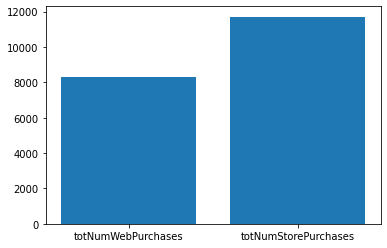

In [21]:
plt.bar(np.array(["totNumWebPurchases","totNumStorePurchases"]),np.array([df["NumWebPurchases"].sum(), df["NumStorePurchases"].sum()]))

## Preprocessing Data

In [22]:
df[df["Income"].isna()]

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age


### Standard Scaler

In [23]:
columns_to_scale = ["Income","Kidhome", "Teenhome", "Recency", "MntWines", "MntFruits",
                  "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds",
                  "NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "NumWebVisitsMonth", "age"]
df_to_scale = df[columns_to_scale]

In [24]:
scaler = StandardScaler()
df_scale = pd.DataFrame(scaler.fit_transform(df_to_scale), columns = columns_to_scale)
df_scale.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,age
0,0.282276,-0.826350,-0.931201,0.313400,0.975903,1.554520,1.666131,2.464957,1.462986,0.862602,0.343988,1.415762,2.495446,-0.552040,0.687328,0.928690
1,-0.263617,1.039393,0.899527,-0.376940,-0.872284,-0.636079,-0.713963,-0.647645,-0.630813,-0.731738,-0.173016,-1.124609,-0.569281,-1.168872,-0.133247,1.356396
2,0.905975,-0.826350,-0.931201,-0.791144,0.356879,0.572527,-0.180645,1.348082,-0.149480,-0.031784,-0.690021,1.415762,-0.228756,1.298459,-0.543535,0.329902
3,-1.175351,1.039393,-0.931201,-0.791144,-0.872284,-0.560541,-0.652257,-0.501170,-0.582679,-0.751181,-0.173016,-0.761699,-0.909807,-0.552040,0.277041,-1.209839
4,0.289450,1.039393,-0.931201,1.556012,-0.392466,0.421452,-0.220314,0.157970,-0.005080,-0.556749,1.377998,0.327032,0.111769,0.064793,-0.133247,-0.953215


In [25]:
columns = ["Education","Marital_Status"]
df_to_oh = df[columns]
df_oh = pd.get_dummies(df_to_oh).reset_index()

""" concatenate the standardized dataset and the one hot encoded dataset """
df_pp = pd.concat([df_scale, df_oh], axis=1)


## Models

### First try with 3 variables

In [26]:
sse = []
for i in range(1,11):
    model = KMeans(n_clusters=i)
    model.fit_transform(df_pp[["Income","MntWines", "age"]])
    sse += [model.inertia_]

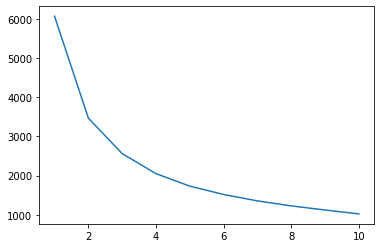

In [27]:
plt.plot([1,2,3,4,5,6,7,8,9,10], sse)

In [26]:
model = KMeans(n_clusters=3)
model.fit_transform(df_pp[["Income","MntWines", "age"]])
labels = model.predict(df_pp[["Income","MntWines","age"]])
df_labels = df_pp[["Income","MntWines","age"]]
df_labels["Label"] = labels

NameError: name 'df_pp' is not defined

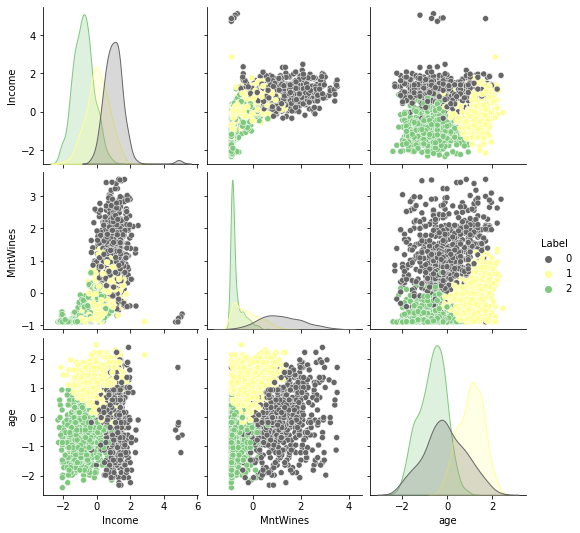

In [29]:
sns.pairplot(data = df_labels, hue="Label", palette="Accent_r")

In [30]:
model = KMeans(n_clusters=4)
columns_model = list(education)+list(marital_status)+["Income", "MntWines", "MntFishProducts", "MntMeatProducts"]
model.fit_transform(df_pp[columns_model])

KeyError: "['Marital_Status_Alone', 'Marital_Status_Absurd', 'Marital_Status_YOLO'] not in index"

In [ ]:
labels = model.predict(df_pp[columns_model])
df_labels = df_pp[columns_model]
df_labels["Label"] = labels

In [ ]:
sns.pairplot(data = df_labels, hue="Label", palette="Accent_r")

In [ ]:
# João 

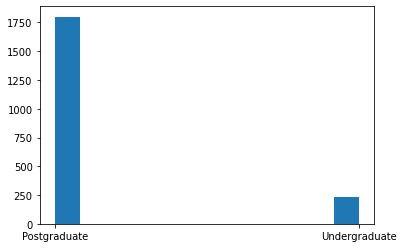

In [98]:
df["Marital_Status"].replace(to_replace=["Together","Married"], value = "couple",inplace=True)
df["Marital_Status"].replace(to_replace=["Single","Divorced","Widow"], value = "single",inplace=True)
df['Children']=df['Kidhome']+df['Teenhome']
df['Has_child'] = np.where(df.Children> 0, 'Has child', 'No child')
df['Education']=df['Education'].replace({'Basic':'Undergraduate','2n Cycle':'Undergraduate','Graduation':'Postgraduate','Master':'Postgraduate','PhD':'Postgraduate'})
plt.hist(df['Education'],bins="auto");

In [99]:
df["Total_Spent"] = df["MntWines"] + df["MntMeatProducts"] + df["MntFruits"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]

dummies = pd.get_dummies(df[["age","Income", "Children", "Education", "Marital_Status",
        "Recency","NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases", 
        "NumStorePurchases", "NumWebVisitsMonth"]])


X = dummies
y = df["Total_Spent"]

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [116]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
model

LinearRegression()

In [76]:
lm = linear_model.LogisticRegression(max_iter=5000)
model = lm.fit(X_train.values, y_train.values)
model

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=5000)

In [117]:
predictions = lm.predict(X_test)
predictions

array([ 7.19256030e+02,  5.75908371e+02,  5.75825073e+02,  2.70281176e+02,
        9.62055488e+02,  1.72040631e+03,  6.64588169e+02,  4.04116597e+00,
        7.06874731e+02,  6.22150839e+02,  1.16962377e+03, -5.91402055e+01,
        1.04309241e+03,  3.99038408e+02,  1.64634973e+03,  7.92262142e+02,
        7.92889451e+02,  9.40096841e+02,  8.81047684e+02,  8.56478838e+02,
        6.24481948e+02,  1.09855459e+03,  1.95612031e+02,  1.24275045e+02,
        1.11154253e+02,  2.92635643e+02,  1.08242884e+02,  5.18455191e+01,
        1.50384440e+02, -1.09476583e+02,  4.34130566e+02,  1.06761156e+03,
       -5.84502672e+01,  1.29753539e+03,  5.85065352e+02,  8.51610461e+02,
        7.43652136e+01,  1.51255036e+03,  9.12755763e+02,  1.31264623e+02,
        2.01874855e+02,  5.15846020e+02, -1.01735249e+02,  5.92293166e+02,
       -6.93851317e+01,  1.14127970e+03,  2.12431814e+02, -1.51064723e+01,
        1.23469838e+03, -1.16314575e-01,  8.70014744e+01,  1.63162117e+01,
        1.45056279e+03,  

Text(0, 0.5, 'Predictions')

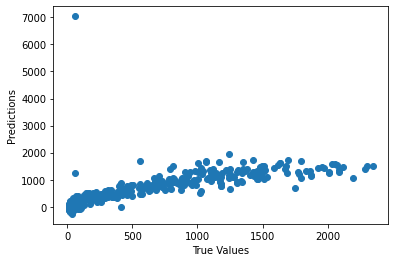

In [118]:
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [119]:
lm.score(X_test, y_test)

0.4610354990973936

In [120]:
#ex
#print("Would spend " + str(lm.predict(np.array([[25,60000,1,20,4,3,1,1,3,1,0,0,1]]))[0]))